# Online-food-order Analysis

## Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Data

In [2]:
PATH = "../data/raw/onlinefoods.csv"
df = pd.read_csv(PATH)

### Standardize Column Names

In [3]:
df.columns = (df.columns
              .str.strip()
              .str.lower()
              .str.replace(r'\s+', '_', regex=True))
print("Columns after standardization:")
print(df.columns.tolist())

Columns after standardization:
['age', 'gender', 'marital_status', 'occupation', 'monthly_income', 'educational_qualifications', 'family_size', 'latitude', 'longitude', 'pin_code', 'output', 'feedback', 'unnamed:_12']


The column "unnamed: 12" occured due to some mistake in data collecting, and there is no data in this column, so we drop it.

In [4]:
df = df.rename(columns={"educational_qualifications": "education"}).drop(columns=["unnamed:_12"], errors="ignore")

Shape, head 3 rows, data type

In [5]:
print("shape:", df.shape)
print("\nhead():")
print(df.head(3))

shape: (388, 12)

head():
   age  gender marital_status occupation  monthly_income      education  \
0   20  Female         Single    Student       No Income  Post Graduate   
1   24  Female         Single    Student  Below Rs.10000       Graduate   
2   22    Male         Single    Student  Below Rs.10000  Post Graduate   

   family_size  latitude  longitude  pin_code output   feedback  
0            4   12.9766    77.5993    560001    Yes   Positive  
1            3   12.9770    77.5773    560009    Yes   Positive  
2            3   12.9551    77.6593    560017    Yes  Negative   


In [6]:
print("\ndtypes:")
print(df.dtypes)


dtypes:
age                 int64
gender             object
marital_status     object
occupation         object
monthly_income     object
education          object
family_size         int64
latitude          float64
longitude         float64
pin_code            int64
output             object
feedback           object
dtype: object


Split the variables into numerical ones and categorical ones.

经纬度位置和pin_code的功能类似，而pin_code更具代表性，所以在接下去的分析中将移除经纬度信息

In [7]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = [col for col in df.select_dtypes(include=['number']).columns if col not in ['latitude', 'longitude']]
print("numeric:", numeric_cols)
print("categorical:", categorical_cols)

numeric: ['age', 'family_size', 'pin_code']
categorical: ['gender', 'marital_status', 'occupation', 'monthly_income', 'education', 'output', 'feedback']


In [8]:
missing = df.isna().sum().sort_values(ascending=False)
print("Missing values:")
print(missing)


Missing values:
age               0
gender            0
marital_status    0
occupation        0
monthly_income    0
education         0
family_size       0
latitude          0
longitude         0
pin_code          0
output            0
feedback          0
dtype: int64


In [9]:
sns.set_theme(style="whitegrid")
plt.rcParams.update({
  "figure.figsize": (10, 5),
  "axes.labelsize": 12,
  "axes.titlesize": 14
})

In [10]:
def plot_num(data, col):
    sns.histplot(data=data, x=col, hue=col, palette="Set2", discrete=True, legend=False)
    plt.title(f"{col.capitalize()} Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

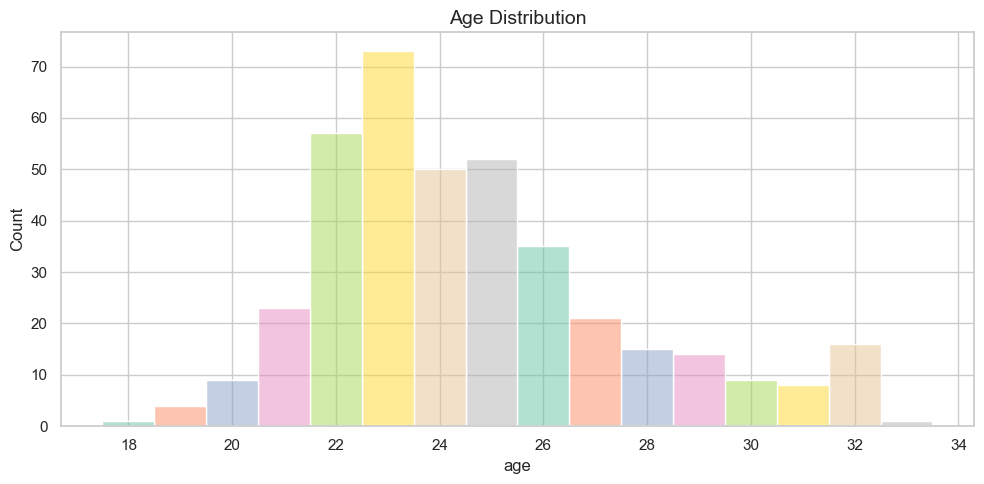

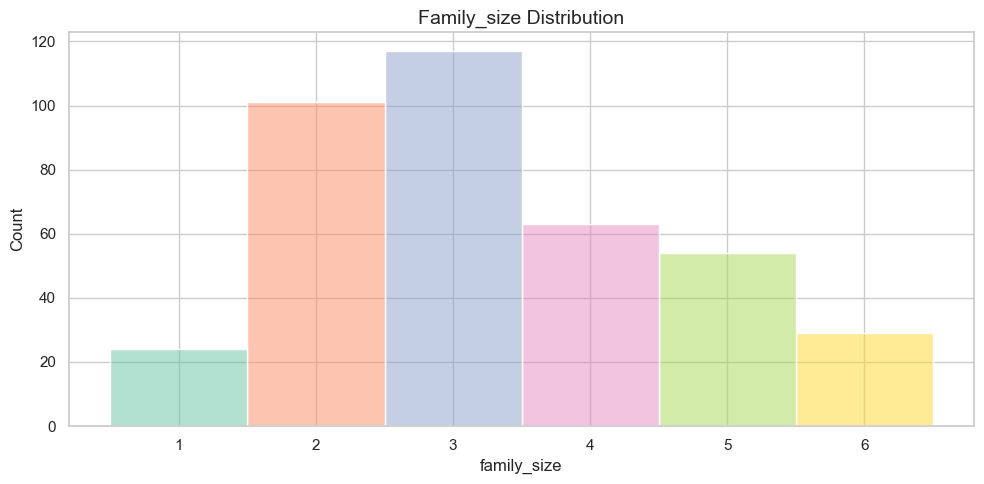

In [11]:
plot_num(df,"age")
plot_num(df,"family_size")

In [12]:
def plot_cat(data, col):
  sns.countplot(data=data, x=col, hue=col, palette="Set2")
  plt.title(f"{col.capitalize()} Distribution")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.tight_layout()
  plt.show()

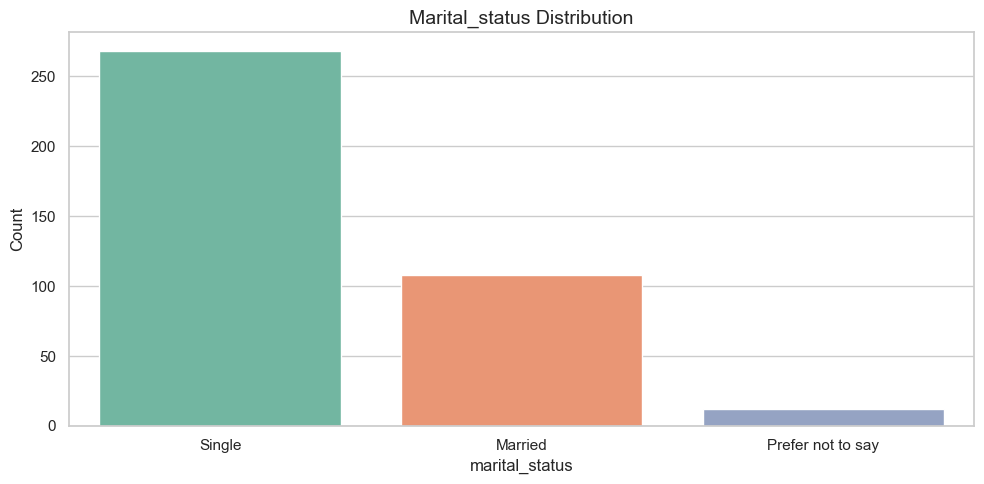

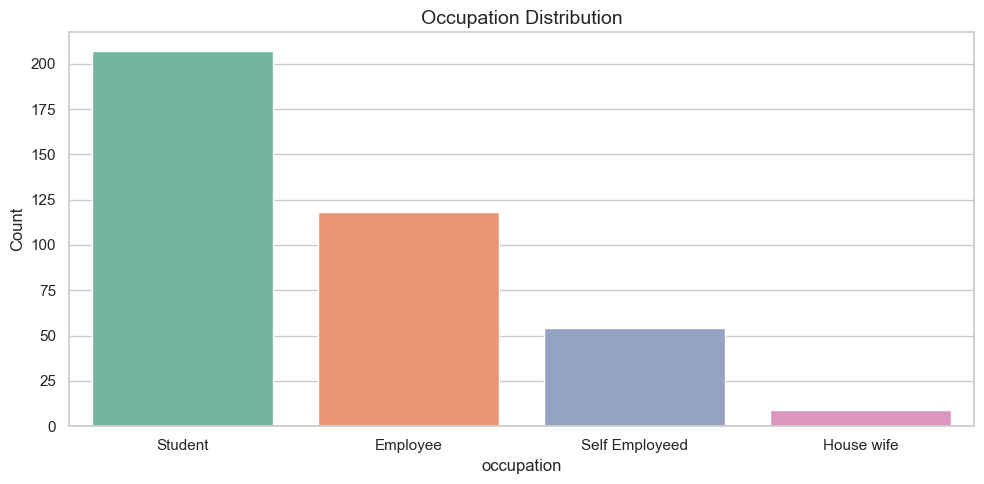

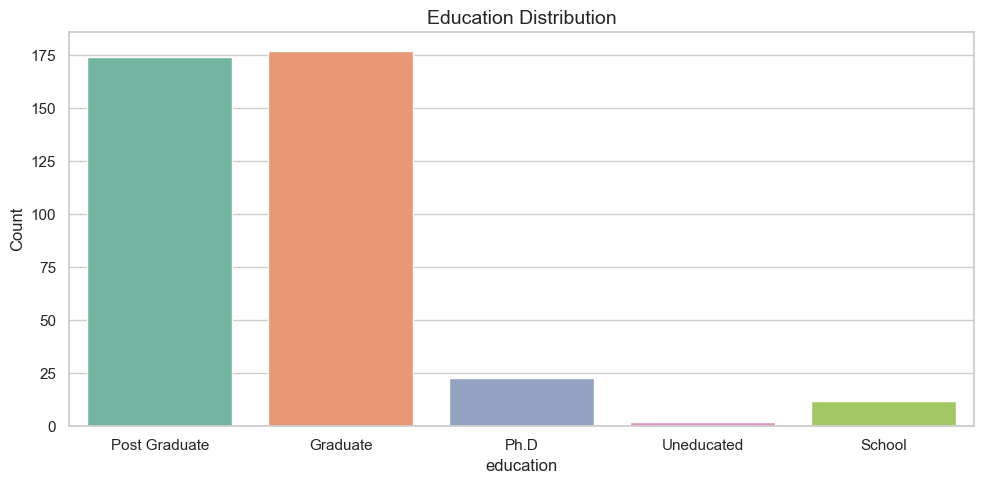

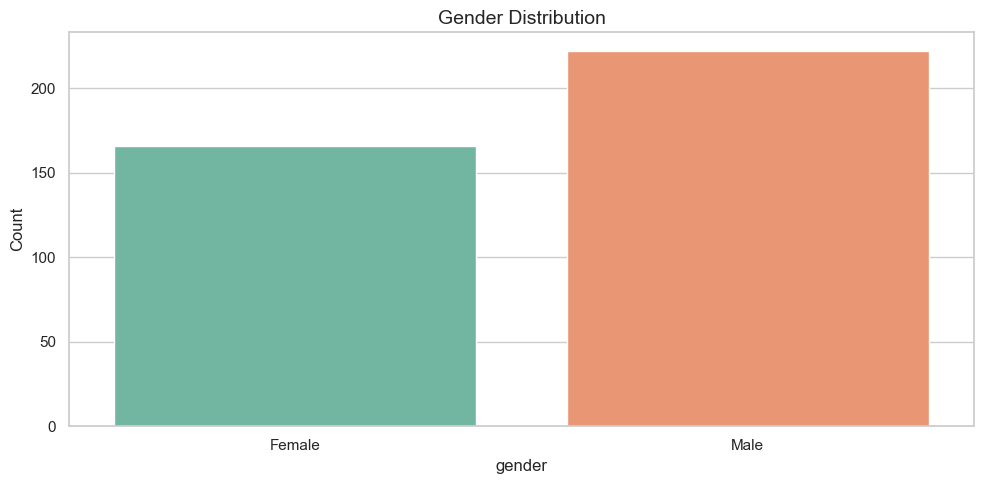

In [13]:
plot_cat(df,"marital_status")
plot_cat(df,"occupation")
plot_cat(df,"education")
plot_cat(df,"gender")

In [14]:
def plot_cat_h(data, col):
  order = data[col].value_counts().index
  palette = sns.color_palette("crest", n_colors=len(order))
  plt.figure(figsize=(10, len(order) * 0.3))
  sns.countplot(data=data, y=col, order=order, palette=palette, hue=col, hue_order=order, legend=False)
  plt.title("Pincode Distribution")
  plt.xlabel("Count")
  plt.ylabel(col)
  plt.tight_layout()
  plt.show()

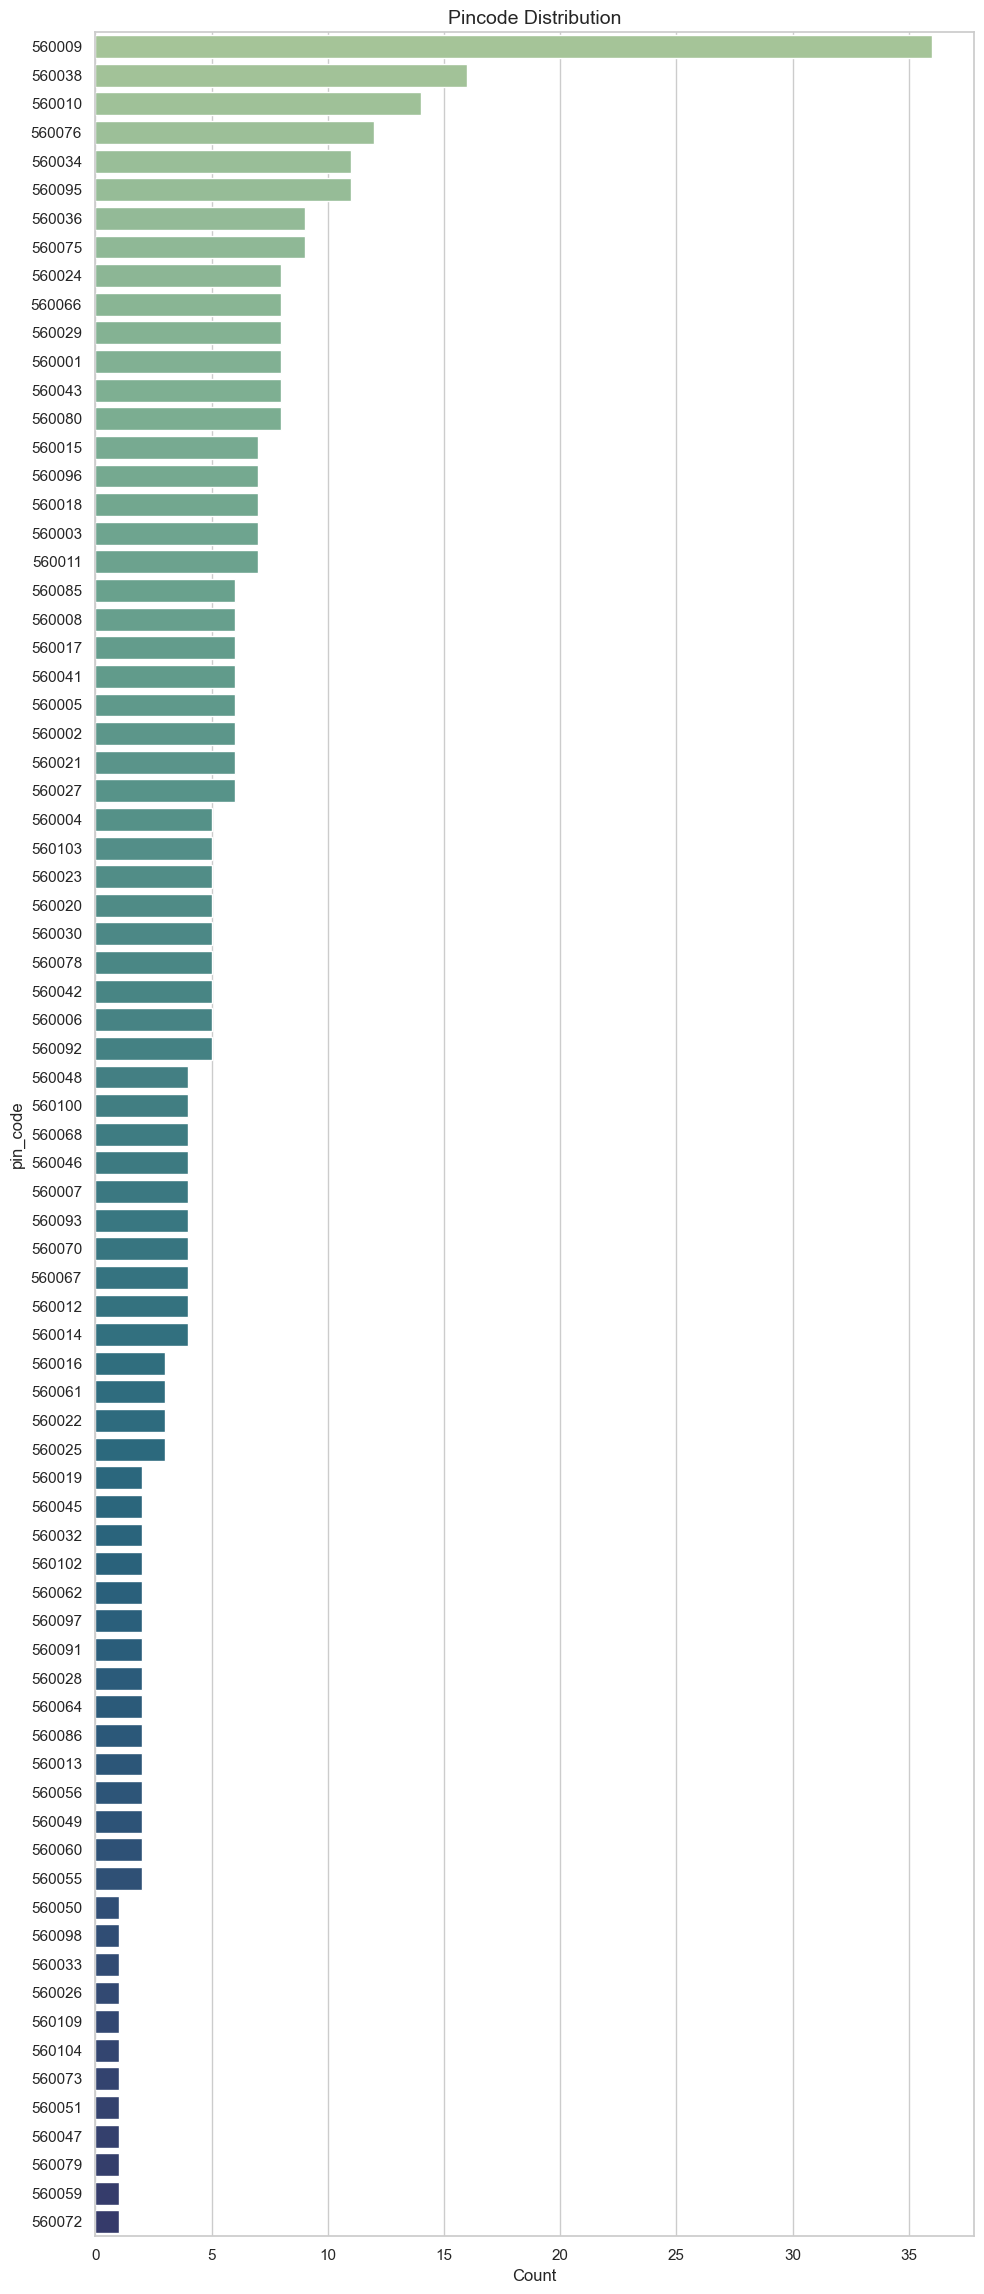

In [15]:
plot_cat_h(df,"pin_code")

## Single Variable Analysis

Choose the output as the responsive variable. Output means whether the user will buy the online food. And visualize each column with the output.

Categorical Variables

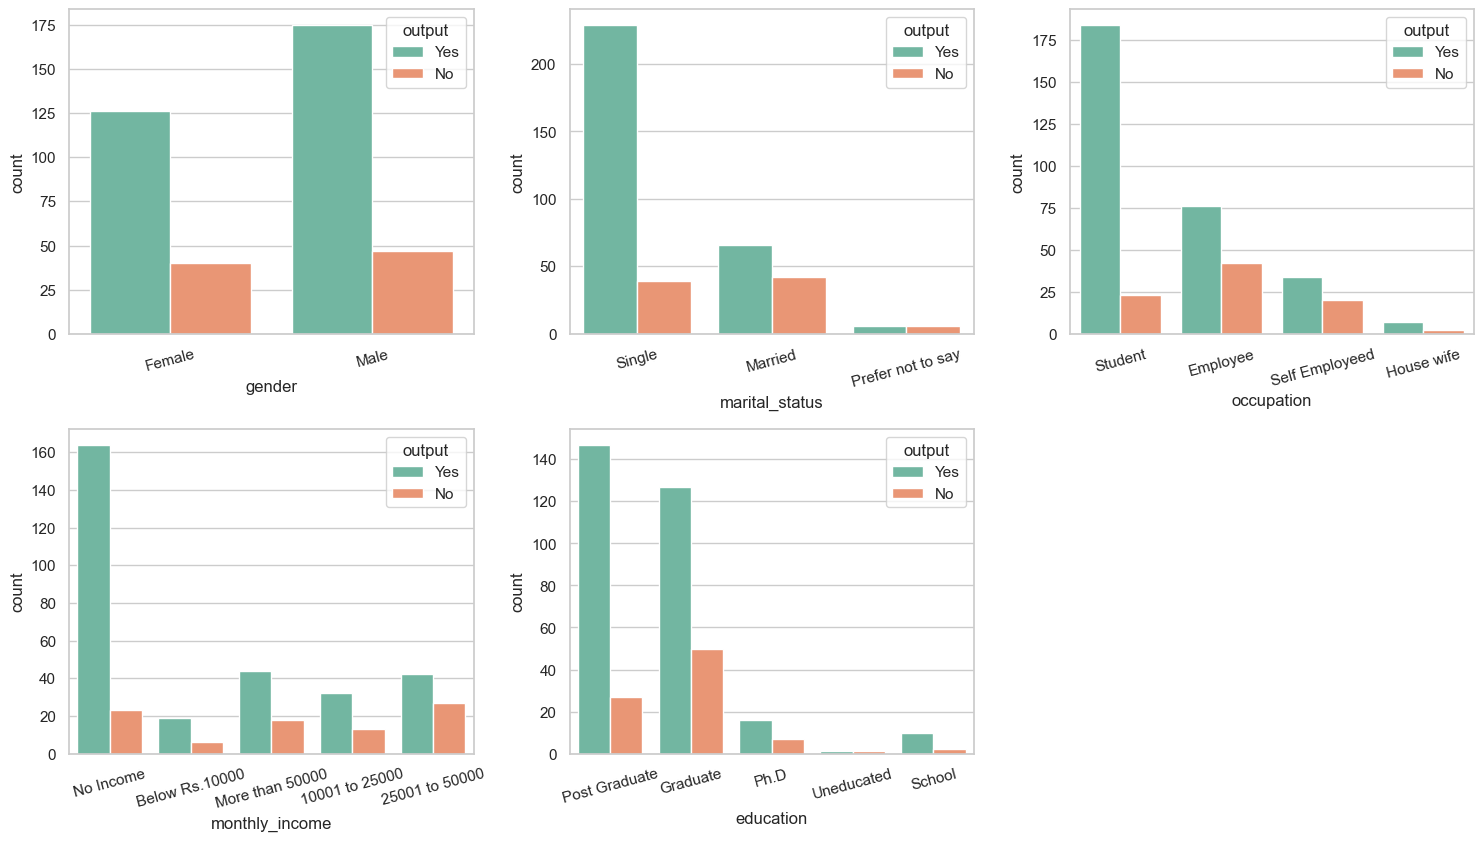

In [18]:
categorical_cols = ['gender', 'marital_status', 'occupation', 'monthly_income', 'education']
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=col, hue='output', palette="Set2")
    plt.xlabel(col)
    plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

According to the plots, we can get the following information:

1. For the Gender: Both female and male users show higher tendency to order online food. Female users have a slightly higher propotion of "Yes", suggesting that women are more likely to purchase food online.
2. Marital Status: Single users dominate the "Yes" group, with significantly more purchases compared to married users, which indicates that single users are the major consumer segment.
3. Occupation: Students are the largest part of buyers, with "Yes" counts overwhelming all other occupations. Employees also participate, but the gap compared to students is significant. Self-employed individuals and housewives show very low preference.
4. Monthly income: The "No Income" group has the highest number of purchases, suggesting that many are students or dependents. Users who earn below 10,000 show the least tendency to purchasing food online, while other income ranges are more likely to buy online food.
5. Education: Postgraduates and Graduates account for the majority of purchases, with Postgraduates leading significantly. Uneducated users show almost no purchases, while Ph.D and school users show a little tendency.

Numerical Vaiables

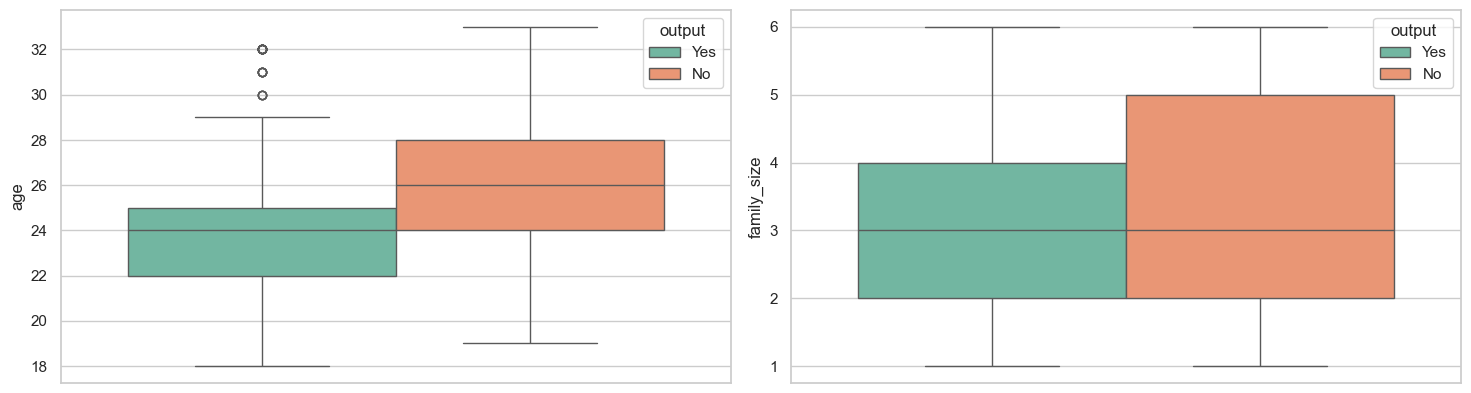

In [22]:
numeric_cols = ['age', 'family_size']
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data=df, y=col, hue="output", palette="Set2")
    plt.ylabel(col)
plt.tight_layout()
plt.show()

For Age, customers who chose to purchase online food tend to be younger, with a median age around 24 years, while non-buyers are generally older, with a median age closer to 26 years. This suggests that younger individuals are more inclined to adopt online food services.

For Family Size, both buyers and non-buyers have the same median value of around 3. However, thier distributions differ: buyers are more concentrated in smaller households of 2-3 members, while non-buyers show a wider spread, with a large proportion coming from households of 4-5 members. This suggests smaller households are more inclined toward online food services.

## Double Variable Analysis

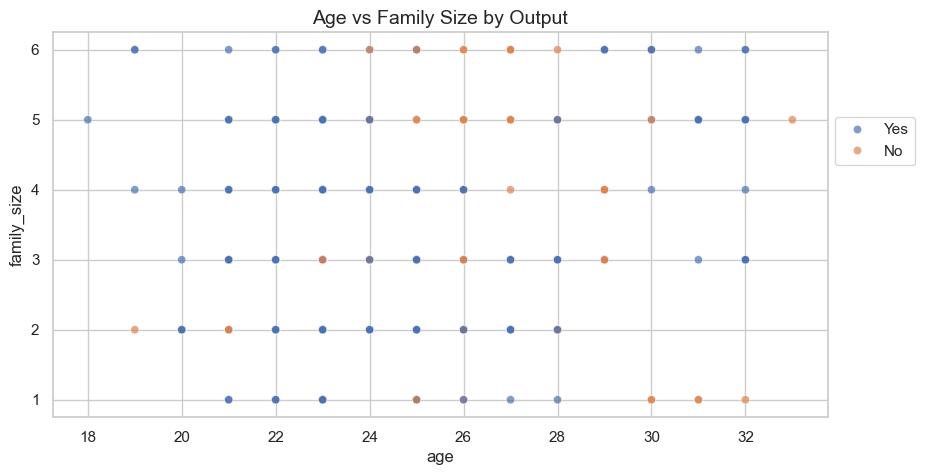

In [27]:
sns.scatterplot(data=df, x="age", y="family_size", hue="output", alpha=0.7)
plt.legend(bbox_to_anchor=(1,0.8))
plt.title("Age vs Family Size by Output")
plt.show()
